<a href="https://colab.research.google.com/github/rhutao/USJT-ProgMulti_Python/blob/master/Aula07_USJT_2020_GERDADOS_visual_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo_usjt.png](https://www.usjt.br/app/themes/mobister/dist/images/sao-judas-universidade.png)

# Gerenciamento de Dados e Informação
- **Professores**: 
- Anderson Sanches <anderson.sanches@saojudas.br>
- Sergio Bonato <antonio.bonato@saojudas.br>

# Aula07 - Visualização de Dados em Python

**Conteúdo**
- Gráficos - Tipos de Visualizações
- Pandas - Visualização de dados
- Seaborn - Dados Estatísticos
- Bokeh - Mapas

In [0]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [0]:
#configuração do notebook para acesso aos datasets
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/dataanalise/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#configuração do notebook para acesso local aos datasets
#path = './datasets/'

### 1. Visualizaçao com o Pandas

Pandas possui um biblioteca para visualização de dados integrada em sua API.

In [0]:
# Importacao das bibliotecas e configuracoes gerais
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn aesthetic parameters to defaults
sns.set()
sns.set_context("notebook")
sns.set(rc={'figure.figsize':(9.4, 6.7)})

Função para geração do gráfico

> *.plot(data, x, y)*

**Exemplo 01**: Gráfico de todos os dados do Dataframe



INDICADOR | JAN/2019 | FEV/2019 | MAR/2019 | ABR/2019 | MAI/2019 | JUN/2019 | JUL/2019 | AGO/2019 | SET/2019 | OUT/2019
---|---|---|---|---|---|---|---|---|---|---|
IPCA | 0,32% | 0,43% | 0,75% | 0,57% | 0,13% | 0,01% | 0,19% | 0,11% | -0,04% | 0,06%
IGPM | 0,01% | 0,88% | 1,26% | 0,92% | 0,45% | 0,80% | 0,40% | -0,67% | -0,01% | 0,65%
CDI | 0,54% | 0,49% | 0,47% | 0,52% | 0,54% | 0,47% | 0,57% | 0,50% | 0,47% | 0,25%
IBOV | 10,82% | -1,86% | -0,18% | 0,98% | 0,70% | 4,06% | 0,84% | -0,67% | 3,57% | 0,65%


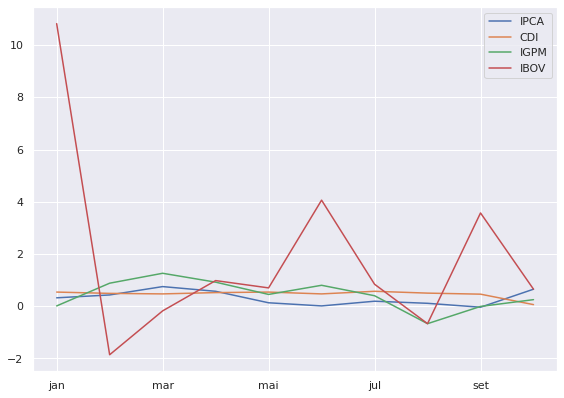

In [0]:
referencias = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out']
cdi = [0.54, 0.49, 0.47, 0.52, 0.54, 0.47, 0.57, 0.50, 0.46, 0.06]
ipca = [0.32, 0.43, 0.75, 0.57, 0.13, 0.01, 0.19, 0.11, -0.04, 0.65]
igpm = [0.01, 0.88, 1.26, 0.92, 0.45, 0.80, 0.40, -0.67, -0.01, 0.25 ]
ibov = [10.82, -1.86, -0.18, 0.98, 0.70, 4.06, 0.84, -0.67, 3.57, 0.65]

df_indicadores = pd.DataFrame(data={'IPCA': ipca, 'CDI': cdi, 'IGPM': igpm, 
                                    'IBOV' : ibov}, index=referencias)
df_indicadores.plot()

**Exemplo 02**: Visualização de selação de dados

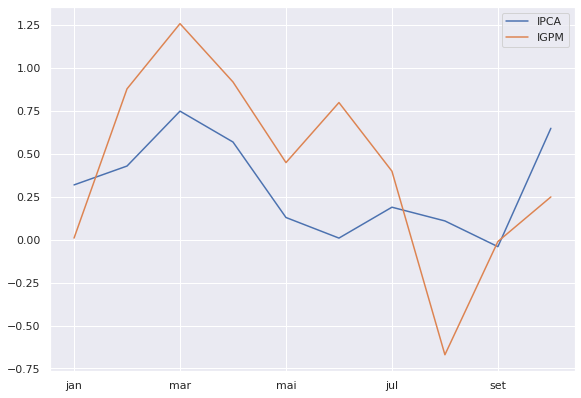

In [0]:
# seleção dos indicadores IPCA e IGPM para compor a visualização
df_indicadores[['IPCA', 'IGPM']].plot()

#### **Exercício 1.01**

Apresentar o gráfico dos indicadores IBOV e CDI

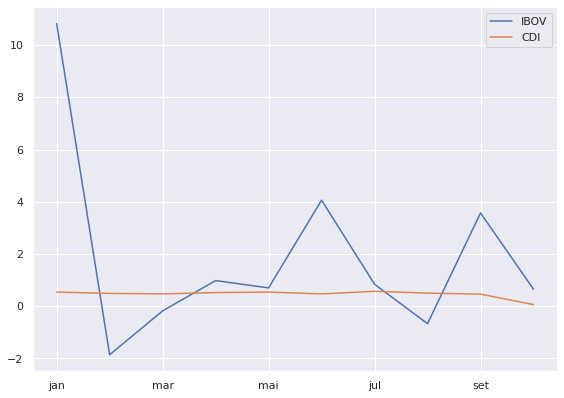

In [0]:
# Implmentação Ex01
#
df_indicadores[['IBOV', 'CDI']].plot()

#### Figuras e subplotagens

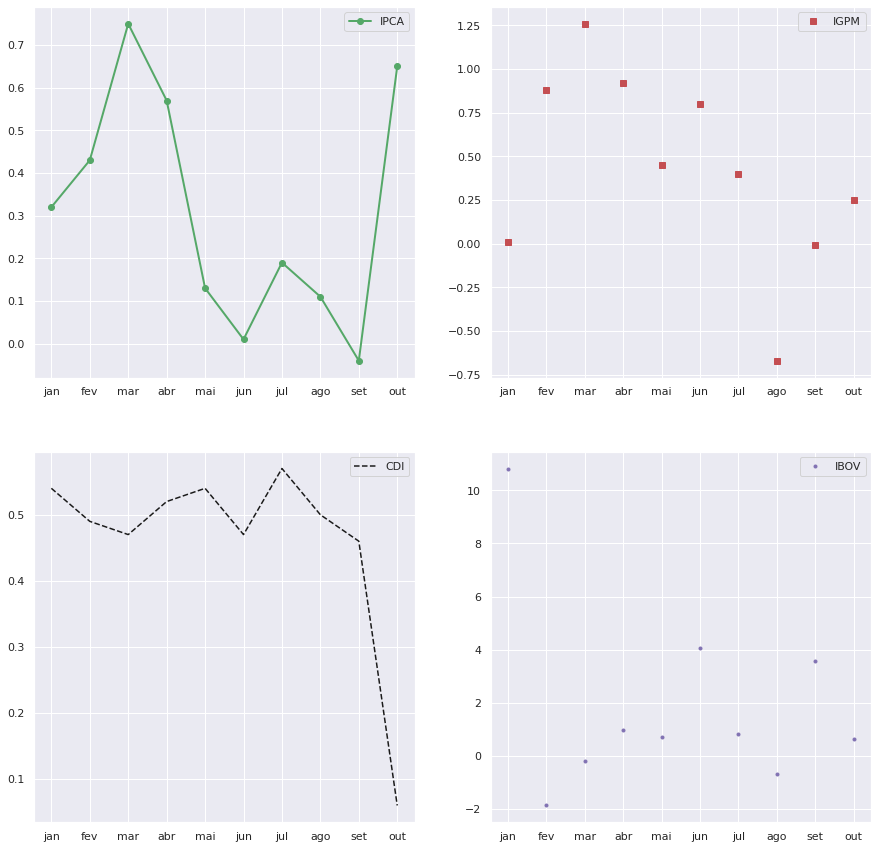

In [0]:
fig=plt.figure(figsize=(15, 15))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)

ax1.plot(df_indicadores['IPCA'], 'go-', label='IPCA', linewidth=2)
ax1.legend(loc='best')
ax2.plot(df_indicadores['IGPM'], 'rs',  label='IGPM')
ax2.legend(loc='best')
ax3.plot(df_indicadores['CDI'], 'k--', label='CDI')
ax3.legend(loc='best')
ax4.plot(df_indicadores['IBOV'], 'm.', label='IBOV')
ax4.legend(loc='best')
plt.show()

In [0]:
ax1.plot(df_indicadores['IPCA'], 'go-', label='IPCA', linewidth=2)
ax1.legend(loc='best')
ax2.plot(df_indicadores['IGPM'], 'rs',  label='IGPM')
ax2.legend(loc='best')
ax3.plot(df_indicadores['CDI'], 'k--', label='CDI')
ax3.legend(loc='best')
ax4.plot(df_indicadores['IBOV'], 'm.', label='IBOV')
ax4.legend(loc='best')

### 2. Tipos de Visualizações

#### Linha

Indicado para apresentação de dados contínuos

**Exemplo 2.01** Visualização dos indicadores econômicos ao longo do tempo


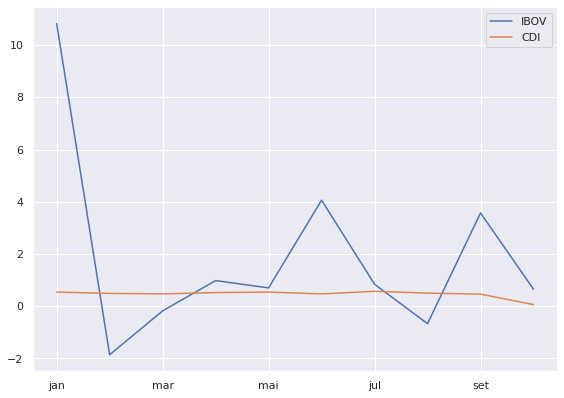

In [0]:
# seleção dos indicadores IPCA e IGPM para compor a visualização
df_indicadores[['IBOV', 'CDI']].plot()

#### Barras

Indicado para a comparação de magnitudes entre diferentes categorias

> *.bar(x, y)* 

**Exemplo 2.02**  - Visualização da série de indicadores em gráfico de barras. 

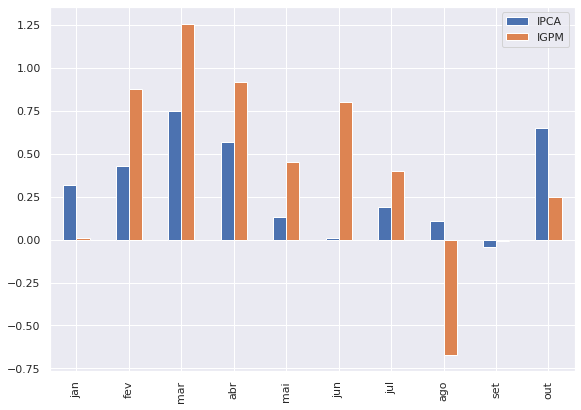

In [0]:
# gráfico de barras com inclusão do título
df_indicadores[['IPCA', 'IGPM']].plot.bar()

#### Pizza

Utilizado para indicar proporções relativas de categorias 

> *.pie(y)*

**Exemplo 2.03** Visualização da proporção dos procedimentos de compra em licitações da BEC no ano

In [0]:
# carregamento do dataset da BEC e geração de informações de quantidade negociada
df_bec = pd.read_excel(path+'03-DS_BEC.xlsx', error_bad_lines=False)
df_bec = df_bec[['Cód Desc Órgão', 'Mês Ano Encerramento', 'Cod Desc Fornecedor', 
                 'Descrição Procedimento Compra', 'Cod Desc Item', 
                 'Quantidade de Item','Valor Unitário Negociado', 
                 'Valor Total Negociado em R$']]
df_bec['Quantidade Negociada'] = df_bec['Valor Total Negociado em R$'] / df_bec[
    'Valor Unitário Negociado']  
df_bec.head(4)

,Cód Desc Órgão,Mês Ano Encerramento,Cod Desc Fornecedor,Descrição Procedimento Compra,Cod Desc Item,Quantidade de Item,Valor Unitário Negociado,Valor Total Negociado em R$,Quantidade Negociada
0,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,28363983000140 - OFICIAL WEB COMERCIAL LTDA - ME,DISPENSA DE LICITAÇÃO,"4843274 - FILME PROTETIVO, DE POLIESTER, 1,00X...",1,168.3,673.2,4.0
1,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,12517378000146 - A. C. DOS SANTOS MÓVEIS ME,DISPENSA DE LICITAÇÃO,"4863801 - ESTANTE DESMONTAVEL DE ACO,ABERTA,06...",1,235.0,1880.0,8.0
2,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,17365274000187 - CBF COMÉRCIO DE CONFECÇÕES BA...,DISPENSA DE LICITAÇÃO,"4628020 - BANDEIRA,MUNICIPIO DE SAO PAULO, MED...",1,170.0,340.0,2.0
3,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,23183671000130 - GALEQ COMÉRCIO INTERNACIONAL ...,DISPENSA DE LICITAÇÃO,"5133017 - NO-BREAK, 600 VA",1,27.6,1104.0,40.0


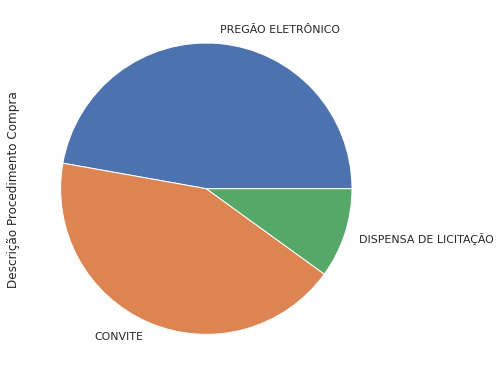

In [0]:
# quantificação das ocorrências de procedimento de compra para visualização
df_bec['Descrição Procedimento Compra'].value_counts().plot.pie(
    x='Descrição Procedimento Compra')

#### Histograma

Representação gráfica da distribuição de frequência de dados tabulados e divididos em classes

> *.hist(bins)*

**Exemplo 2.04** - Visualização da frequência de valores unitários de feijão adquiridos pelo BEC

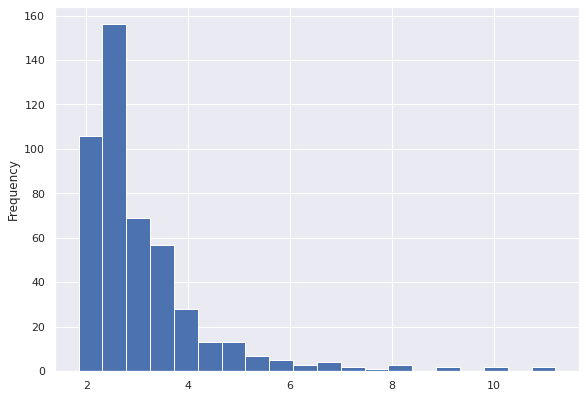

In [0]:
# histograma com a frequência de valores negociados do item Feijão Carioca
df_bec.loc[df_bec['Cod Desc Item'] == '120456 - FEIJAO CARIOCA, GRUPO 1, TIPO 1', 
           'Valor Unitário Negociado'].plot.hist(bins=20)

#### Função Densidade de Probabilidade

Indicado para visualizar a probabilidade relativa de uma variável aleatória tomar um valor.

> *.kde()*

**Exemplo 2.05** - Visualização da probablidade estimada de ocorrência do valor unitário do feijão em aquisições na BEC

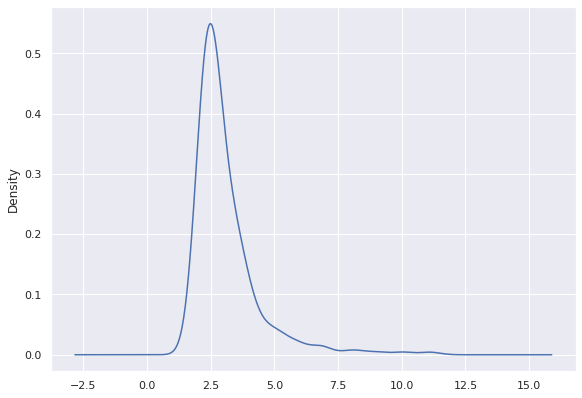

In [0]:
# função de densidade estimada
df_bec.loc[df_bec['Cod Desc Item'] == 
           '120456 - FEIJAO CARIOCA, GRUPO 1, TIPO 1', 
           'Valor Unitário Negociado'].plot.kde()

#### Boxplot

Utilizado para descrever grupos de dados numéricos distribuídos nos respectivos quartis.

> *.box(data, column)*

**Exemplo 2.06** - Visualização da dispersão valores de aquisição de feijão distribuídas nos percentis com a estimativa de possíveis outliers

In [0]:
# estatísticas gerais
df_bec.loc[df_bec['Cod Desc Item'] == 
           '120456 - FEIJAO CARIOCA, GRUPO 1, TIPO 1', 
           ['Valor Unitário Negociado']].describe()

,Valor Unitário Negociado
count,473.000000
mean,3.111049
std,1.327834
min,1.850000
25%,2.350000
50%,2.690000
75%,3.450000
max,11.210000


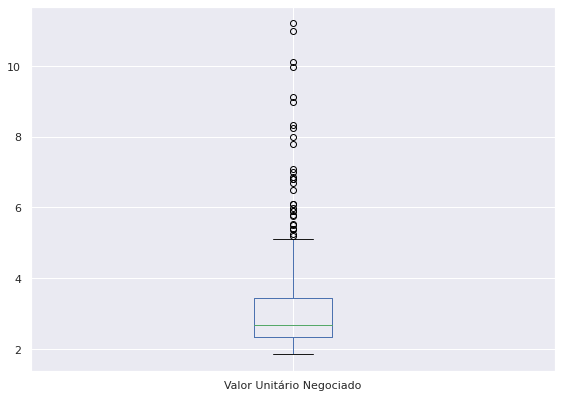

In [0]:
# visualização dos dos grupos de valores negociados do feijão com a seleção 
# de possíveis outliers
df_bec.loc[df_bec['Cod Desc Item'] == 
           '120456 - FEIJAO CARIOCA, GRUPO 1, TIPO 1', 
           'Valor Unitário Negociado'].plot.box()

**Dados para os exercícios:**


In [0]:
df_bec.head(1)

#### Exercício 2.01

Apresentar o 'Valor Total Negociado em R$' pela '20000 - SECRETARIA DA FAZENDA E PLANEJAMENTO' ao longo dos meses

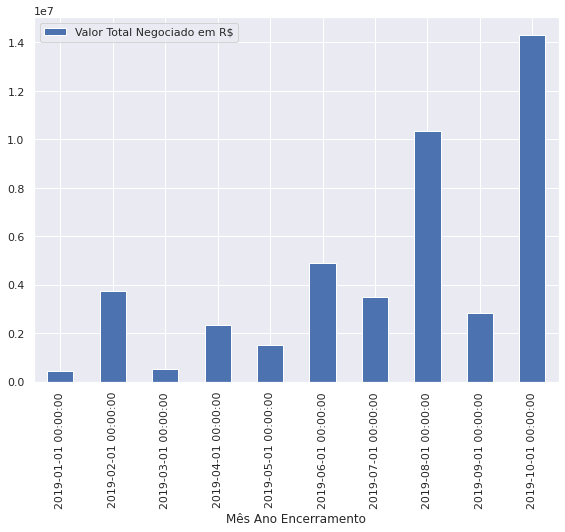

In [0]:
# Implementação Ex02.1
#
#
data = (
    df_bec[df_bec['Cód Desc Órgão'] == '20000 - SECRETARIA DA FAZENDA E PLANEJAMENTO']
    .groupby('Mês Ano Encerramento')
    .agg({'Valor Total Negociado em R$' : 'sum'})
)
data.plot.bar()

#### Exercício 2.02

Apresentar a proporção do 'Valor Total Negociado em R$' para cada um dos tipos de procedimentos de compra

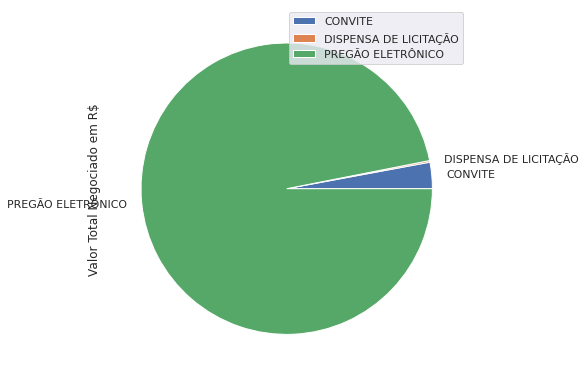

In [0]:
# Implementação Ex02.2
#
data = (
    df_bec[df_bec['Cód Desc Órgão'] == '20000 - SECRETARIA DA FAZENDA E PLANEJAMENTO']
    .groupby('Descrição Procedimento Compra')
    .agg({'Valor Total Negociado em R$' : 'sum'})
)
data.plot.pie(y='Valor Total Negociado em R$')

### 3. Customização dos Gráficos


Lista das principais customizações permitidas pelo Pandas:


Argumento | Descrição
----------|-----------
label | Rótulo para legenda do gráfico
kind | Tipo: bar, barh, density, hist, kde, line, pie
use_index | Usar índice como rótulo
rot| Rotação dos rótulos (0-360)
xticks | Rótulos do eixo x
yticks | Rótulos do eixo y
sort_columns | Ordenar colunas
xlim | Limite do eixo x
ylim | Limite do eixo y
grid | Exibir gride
subplots | Plota cada coluna em um gráfico independente
sharex | Compartilha o eixo x
sharey | Compartilha o eixo y
figsize| Tamanho da figura (tupla)
title | Título do gráfico
legend | Exibir legenda
sort_columns | Ordenar colunas

In [0]:
df_bec.head(2)

,Cód Desc Órgão,Mês Ano Encerramento,Cod Desc Fornecedor,Descrição Procedimento Compra,Cod Desc Item,Quantidade de Item,Valor Unitário Negociado,Valor Total Negociado em R$,Quantidade Negociada
0,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,28363983000140 - OFICIAL WEB COMERCIAL LTDA - ME,DISPENSA DE LICITAÇÃO,"4843274 - FILME PROTETIVO, DE POLIESTER, 1,00X...",1,168.3,673.2,4.0
1,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,12517378000146 - A. C. DOS SANTOS MÓVEIS ME,DISPENSA DE LICITAÇÃO,"4863801 - ESTANTE DESMONTAVEL DE ACO,ABERTA,06...",1,235.0,1880.0,8.0


**Exemplo 3.01** Total Negociado por tipo de procedimento de compra

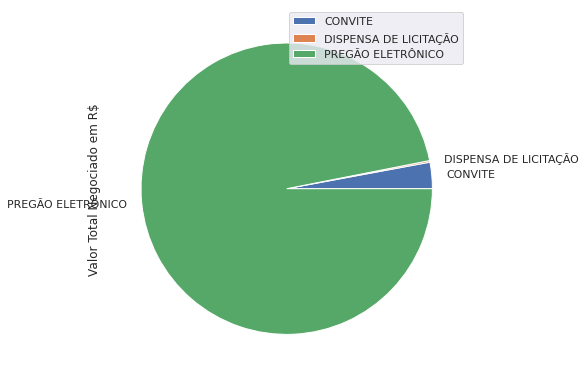

In [0]:
data = (
    df_bec[df_bec['Cód Desc Órgão'] == '20000 - SECRETARIA DA FAZENDA E PLANEJAMENTO']
    .groupby('Descrição Procedimento Compra')
    .agg({'Valor Total Negociado em R$' : 'sum'})
)

#grafico sem ajustes
data.plot.pie(y='Valor Total Negociado em R$')

------

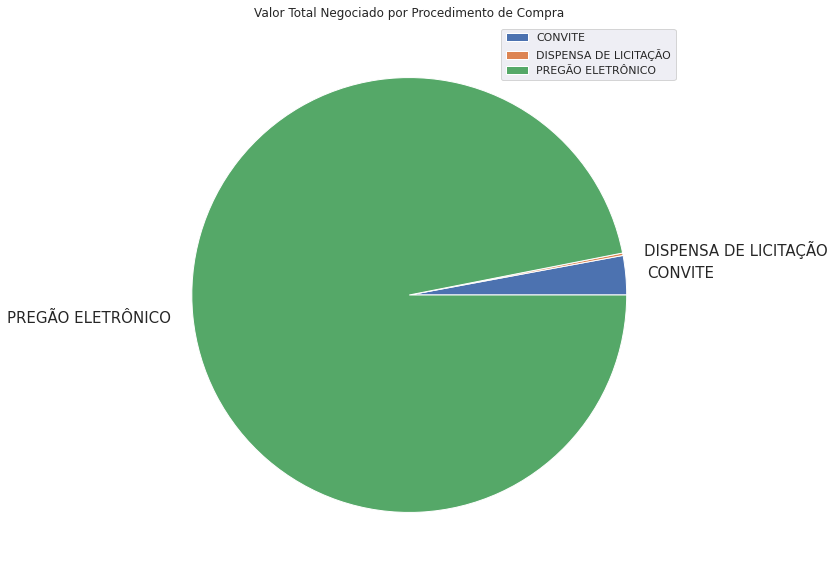

In [0]:
#versao ajustada
data.plot.pie(y='Valor Total Negociado em R$', label='', 
              title='Valor Total Negociado por Procedimento de Compra', legend=True,
              fontsize=15, figsize=(10,10))

#### Exercício 3.01

Adicionar o título adequado para o gráfico resposta do exercício 2.01



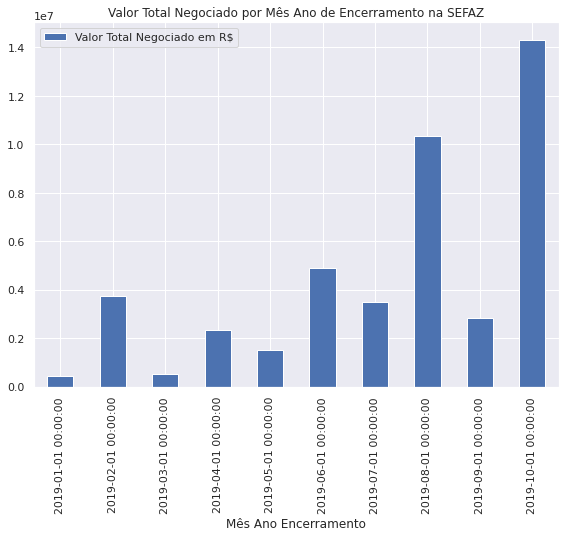

In [0]:
# Implementação Ex3.01
#
#
data = (
    df_bec[df_bec['Cód Desc Órgão'] == '20000 - SECRETARIA DA FAZENDA E PLANEJAMENTO']
    .groupby('Mês Ano Encerramento')
    .agg({'Valor Total Negociado em R$' : 'sum'})
)
ax = data.plot.bar(title='Valor Total Negociado por Mês Ano de Encerramento na SEFAZ')

### 4. Seaborn - Dados Estatísticos

Seaborn é uma biblioteca python para visualização de dados baseada no Matplotlib com foco na geração de gráficos estatíscos.


#### Linha

Por padrão agrega múltiplos valores de y em cada valor de x e apresenta uma estimativa da tendência central e intervalo de confiança.

> *.lineplot(data, x, y, hue)*

**Exemplo 04.1** - Valores negociados do item feijão carioca ao longo do ano

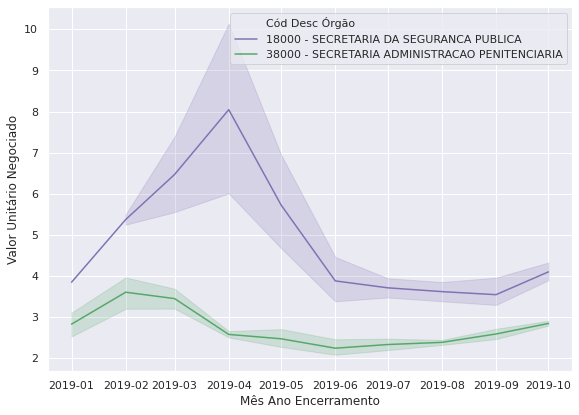

In [0]:
orgaos = ['18000 - SECRETARIA DA SEGURANCA PUBLICA',
          '38000 - SECRETARIA ADMINISTRACAO PENITENCIARIA']
item = '120456 - FEIJAO CARIOCA, GRUPO 1, TIPO 1'
data = df_bec.loc[(df_bec['Cod Desc Item'] == item) & 
                  (df_bec['Cód Desc Órgão'].isin(orgaos)), ['Mês Ano Encerramento', 
                                                            'Valor Unitário Negociado',
                                                            'Cód Desc Órgão']]
sns.lineplot(x="Mês Ano Encerramento", y="Valor Unitário Negociado", hue='Cód Desc Órgão', palette=["m", "g"], data=data)



#### Distplot

Combina as visualizações de histograma e função de densidade de probabilidade.

> *.distplot(data)*

**Exemplo 04.02** - Frequencia e distribuição de probabilidade de valores na aquisição do feijão carioca

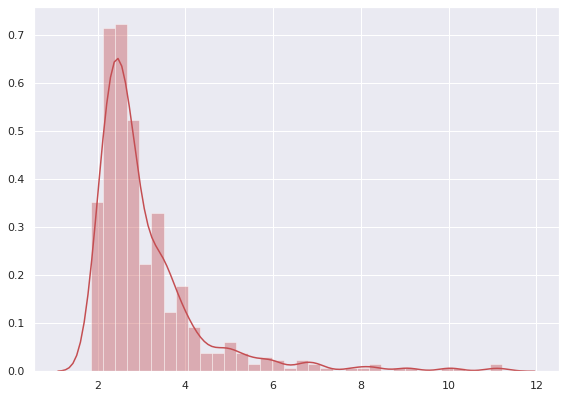

In [0]:
data = df_bec.loc[df_bec['Cod Desc Item'] == '120456 - FEIJAO CARIOCA, GRUPO 1, TIPO 1', 
                  ['Valor Unitário Negociado']]
sns.distplot(data, color='r')

#### Regressão

Apresenta dados e a regressão linear estimada.

> *.regplot(x, y, data)*

**Exemplo 04.03** - Valores negociados do item Papel Sulfite em função da quaintidade negociada

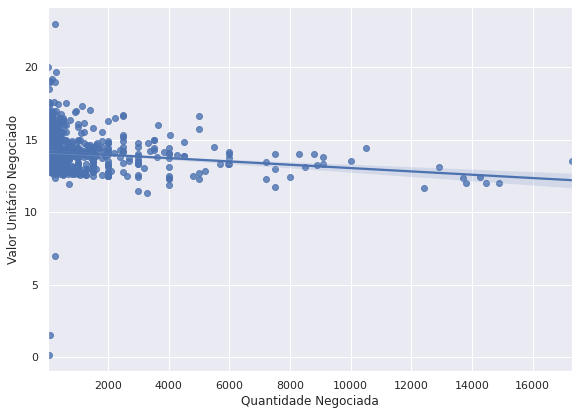

In [0]:
df_papel = df_bec[df_bec['Cod Desc Item'] == 
            '2903881 - PAPEL SULFITE DE PAPELARIA,FORMATO A4,(210X297)MM,75G,BRANCO']
data = df_papel[['Quantidade Negociada', 'Valor Unitário Negociado']]
data = data[(data['Quantidade Negociada'] < 20000) & 
            (data['Valor Unitário Negociado'] < 120)]
ax = sns.regplot(x='Quantidade Negociada', y='Valor Unitário Negociado', data=data)

#### Jointplot

Visualiza os dados combinando a regressão linear estimada com a função de distribuição de probabilidade.

> *.jointplot(x, y, data, kind="reg")*

**Exemplo 04.04** Jointplot dos valores negociados do item Papel Sulfite em função da quaintidade negociada

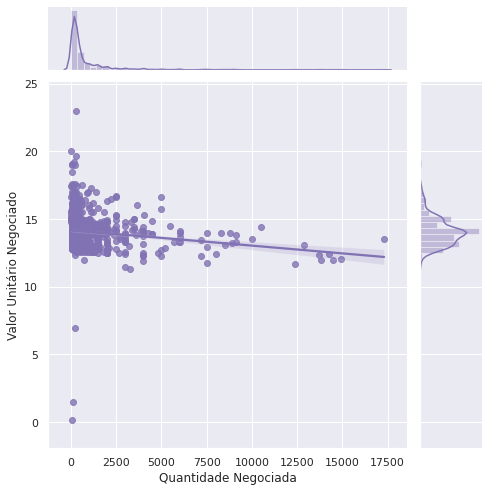

In [0]:
g = sns.jointplot(x='Quantidade Negociada', y='Valor Unitário Negociado', data=data, 
                  kind="reg", color="m", height=7)

#### Heatmap

Representação gráfica que utiliza um sistema de cores para representar diferentes valores. 

> *.heatmap(data)*



**Exemplo 4.05** - Visualização do nível de correlação entre diferentes ações da bolsa

In [0]:
df_acoes = pd.read_csv(path+'04-DS_ACOES.csv', error_bad_lines=False, sep=';', 
                       parse_dates=['Date'])
df_acoes.set_index('Date', inplace=True)
df_acoes.head(5)

,VALE3.SA,LREN3.SA,CMIG3.SA,OIBR4.SA,BBDC3.SA,ITSA4.SA,USIM5.SA,BRML3.SA,PETR3.SA,VIVT4.SA,ENBR3.SA,RADL3.SA
Date,,,,,,,,,,,,
2018-01-02,41.720001,NaN,6.60,3.42,24.454500,10.0273,9.60,12.40,17.330000,49.009998,14.20,90.449997
2018-01-03,41.470001,NaN,6.61,3.42,24.545500,10.1454,9.92,12.36,17.549999,48.419998,13.56,88.209999
2018-01-04,41.639999,NaN,6.55,3.42,24.992399,10.3364,10.48,12.51,17.700001,49.400002,13.58,88.889999
2018-01-05,42.290001,NaN,6.55,3.44,25.000000,10.3546,10.03,12.55,17.840000,49.630001,13.46,90.449997
2018-01-08,43.230000,NaN,6.50,3.43,25.000000,10.3455,10.14,12.50,18.120001,50.009998,13.68,89.300003


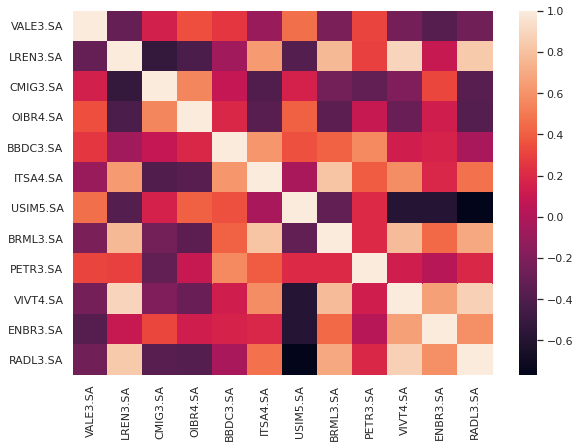

In [0]:
sns.heatmap(df_acoes.loc['2019'].corr())

#### Exercício 4.01

Apresentar os valores negociados do item '2903881 - PAPEL SULFITE DE PAPELARIA,FORMATO A4,(210X297)MM,75G,BRANCO' ao longo dos meses com uma estimativa gráfica da tendência central e intervalo de confiança.


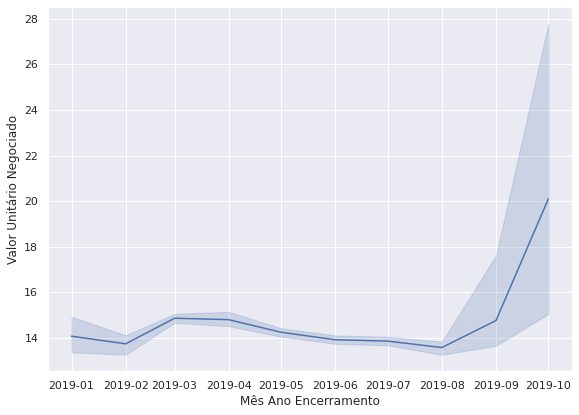

In [0]:
papel = df_bec.loc[df_bec['Cod Desc Item'] == '2903881 - PAPEL SULFITE DE PAPELARIA,FORMATO A4,(210X297)MM,75G,BRANCO']
sns.lineplot(x="Mês Ano Encerramento", y="Valor Unitário Negociado", data=papel)

### 5. Bokeh - Dados em Mapas

Bokeh é uma biblioteca para visualização de dados em Python de forma interativa

In [0]:
# carregamento da biblioteca
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import WMTSTileSource

**Exemplo 5.01** - Visualização da localização de roubos em SP

In [0]:
df_crime = pd.read_excel(path+'05-DS_CRIME_SP.xlsx', parse_dates=['DATA_OCORRENCIA_BO'], 
                         error_bad_lines=False)
df_crime = df_crime[['RUBRICA', 'NOME_DELEGACIA', 'DATA_OCORRENCIA_BO', 
                     'HORA_OCORRENCIA_BO','DESCR_TIPOLOCAL', 'LOGRADOURO', 
                     'NUMERO_LOGRADOURO','SEXO_PESSOA', 
                     'IDADE_PESSOA','x', 'y']]
df_crime.head(4)

,RUBRICA,NOME_DELEGACIA,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,DESCR_TIPOLOCAL,LOGRADOURO,NUMERO_LOGRADOURO,SEXO_PESSOA,IDADE_PESSOA,x,y
0,Roubo (art. 157),40º D.P. VILA STA MARIA,2015-05-21,21:00:00,Via pública,RUA DOMICIANO RIBEIRO,968.0,M,54,-5.195591e+05,-2.690467e+06
1,Roubo (art. 157),75º D.P. JARDIM ARPOADOR,2015-06-24,06:40:00,Via pública,RUA FREI VITAL DE FRESCAROLO,30.0,M,16,-5.208704e+06,-2.704744e+06
2,Roubo (art. 157),91º D.P. CEASA,2015-10-28,20:15:00,Via pública,RUA ALIANCA LIBERAL,286.0,M,56,-5.201337e+06,-2.695291e+06
3,Roubo (art. 157),DEIC - 3ª DELEGACIA DA DIVECAR,2015-06-11,09:00:00,Via pública,RUA ANTONIO CRESPO,33.0,M,31,-5.169712e+06,-2.622279e+05


In [0]:
# filtro de dados da rubrica 
df_roubo = df_crime.loc[df_crime['RUBRICA'] == 'Roubo (art. 157)', 
                        ['RUBRICA', 'x', 'y']].dropna()
df_roubo.head(2)

,RUBRICA,x,y
0,Roubo (art. 157),-5.195591e+05,-2.690467e+06
1,Roubo (art. 157),-5.208704e+06,-2.704744e+06


In [0]:
df_crime['RUBRICA'].value_counts()

Roubo (art. 157)                                                          81766
Furto (art. 155)                                                          56104
Lesão corporal (art. 129)                                                 12865
Furto qualificado (art. 155, §4o.)                                        11989
Lesão corporal culposa na direção de veículo automotor (Art. 303)         11374
Lesão corporal (art 129 § 9º)                                              2757
A.I.-Roubo (art. 157)                                                      2083
Homicídio simples (art. 121)                                               1365
A.I.-Lesão corporal (art. 129)                                             1055
Lesão corporal culposa (art. 129. §6o.)                                     480
A.I.-Furto (art. 155)                                                       336
Homicídio culposo na direção de veículo automotor (Art. 302)                286
Homicídio qualificado (art. 121, §2o.)  

In [0]:
# web mercator coordinates
SP = y_range, x_range =  ((-2753408,-2632018), (-5232016, -5120696))
p = figure(x_range=x_range, y_range=y_range, x_axis_type="mercator", 
           y_axis_type="mercator")
url = 'http://a.basemaps.cartocdn.com/rastertiles/voyager/{Z}/{X}/{Y}.png'
attribution = "Tiles by Carto, under CC BY 3.0. Data by OSM, under ODbL"
p.add_tile(WMTSTileSource(url=url, attribution=attribution))
p.circle(x=df_roubo['x'], y=df_roubo['y'], fill_color='orange', size=5)
output_notebook()
show(p)

#### Exercício 5.01 

Exibir no mapa as ocorrências da RUBRICA 'Homicídio simples (art. 121)'

In [0]:
# Implementação
#
#
df_roubo = df_crime.loc[df_crime['RUBRICA'] == 'Homicídio simples (art. 121)', 
                        ['RUBRICA', 'x', 'y']].dropna()
SP = y_range, x_range =  ((-2753408,-2632018), (-5232016, -5120696))
p = figure(x_range=x_range, y_range=y_range, x_axis_type="mercator", 
           y_axis_type="mercator")
url = 'http://a.basemaps.cartocdn.com/rastertiles/voyager/{Z}/{X}/{Y}.png'
attribution = "Tiles by Carto, under CC BY 3.0. Data by OSM, under ODbL"
p.add_tile(WMTSTileSource(url=url, attribution=attribution))
p.square(x=df_roubo['x'], y=df_roubo['y'], fill_color='blue', size=15)
output_notebook()
show(p)